## PRODIGY_DS_01


- Understand the Data

In [ ]:
# Set Up Your Python Environment

!pip install pandas matplotlib seaborn


In [ ]:
import pandas as pd

# Load the dataset, skipping metadata rows at the top
data_file = 'API_SP.POP.TOTL_DS2_en_csv_v2_3401680.csv'
df = pd.read_csv(data_file, skiprows=4)

In [12]:
# Display the first few rows and column names
pd.set_option('display.expand_frame_repr', False) 
print(df.head())
print(df.columns)
print(df.dtypes)


                  Country Name Country Code     Indicator Name Indicator Code         1960         1961         1962         1963         1964         1965  ...         2014         2015         2016         2017         2018         2019         2020         2021         2022         2023
0                        Aruba          ABW  Population, total    SP.POP.TOTL      54608.0      55811.0      56682.0      57475.0      58178.0      58782.0  ...     103594.0     104257.0     104874.0     105439.0     105962.0     106442.0     106585.0     106537.0     106445.0     106277.0
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL  130692579.0  134169237.0  137835590.0  141630546.0  145605995.0  149742351.0  ...  583651101.0  600008424.0  616377605.0  632746570.0  649757148.0  667242986.0  685112979.0  702977106.0  720859132.0  739108306.0
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL    8622466.0    8790140.0    8969047.0    9157465

- Prepare the Data:

In [13]:
# Drop columns where all values are NaN
df = df.dropna(how='all', axis=1)

# Drop rows where all values are NaN
df = df.dropna(how='all', axis=0)

# Check for any remaining missing values
print(df.isnull().sum())

#df.dropna(how='all', axis=1): Drops columns where all values are NaN (missing).
#df.dropna(how='all', axis=0): Drops rows where all values are NaN.
#df.isnull().sum(): Shows the number of missing values in each column.


Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              2
                 ..
2019              1
2020              1
2021              1
2022              1
2023              1
Length: 68, dtype: int64


In [14]:
# Filter Relevant Columns
df_filtered = df[['Country Name', 'Country Code', '1960', '1970', '1980', '1990', '2000', '2010', '2020']]
#print(df_filtered)
# Melt the DataFrame
df_melted = df_filtered.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Population')

# Display the first few rows of the melted DataFrame
#print(df_melted)

# Convert Data Types
# Convert 'Year' to integer
df_melted['Year'] = df_melted['Year'].astype(int)

# Handle missing values in 'Population' column (e.g., fill with 0)
df_melted['Population'] = df_melted['Population'].fillna(0)

# Display the data types to confirm changes
print(df_melted.dtypes)


Country Name     object
Country Code     object
Year              int64
Population      float64
dtype: object


-  Simulate Age or Gender Data

In [15]:
# simulate age && gender  
import numpy as np

# Set the seed for reproducibility
np.random.seed(42)

# Simulate age data (0 to 100)
df_melted['Age'] = np.random.randint(0, 101, size=len(df_melted))

# Simulate gender data (Male, Female) with equal probability
df_melted['Gender'] = np.random.choice(['Male', 'Female'], size=len(df_melted), p=[0.5, 0.5])

df_melted.index+=1
#  np.random.seed(42)                                        >> This is useful for reproducibility, allowing you (or others) to get the same results when running the code again.
#  np.random.randint(0, 101, size=len(df_filtered))          >> generates random integers between 0 and 100 for each row in your DataFrame.
#  df_filtered['Age']                                        >> creates a new column Age in your DataFrame.
print(df_melted.head())


                  Country Name Country Code  Year   Population  Age  Gender
1                        Aruba          ABW  1960      54608.0   51  Female
2  Africa Eastern and Southern          AFE  1960  130692579.0   92  Female
3                  Afghanistan          AFG  1960    8622466.0   14  Female
4   Africa Western and Central          AFW  1960   97256290.0   71    Male
5                       Angola          AGO  1960    5357195.0   60  Female


-  Prepare Data for Visualization

In [16]:
# Group the data by age and gender to visualize the distributions.
# Define age bins and labels
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

# Create an 'Age Group' column
df_melted['Age Group'] = pd.cut(df_melted['Age'], bins=age_bins, labels=age_labels, right=False)
print(df_melted.head())
# Aggregate data for visualization
age_gender_distribution= df_melted.groupby(['Age Group', 'Gender'])['Population'].sum().reset_index()


# pd.cut is used to segment and sort data values into bins. Here, it creates a new column 'Age Group' in the DataFrame df_melted.
# df_melted['Age'] is the column containing age data.
# bins=age_bins defines the boundaries of the bins.
# labels=age_labels assigns labels to each bin.
#right=False means that the intervals are left-closed (i.e., include the left boundary but not the right boundary).



# This aggregation creates a DataFrame age_gender_distribution that contains the total population for each combination of age group and gender. 
# You can use this DataFrame to create visualizations that show how the population is distributed across different age groups and genders.

                  Country Name Country Code  Year   Population  Age  Gender Age Group
1                        Aruba          ABW  1960      54608.0   51  Female     50-59
2  Africa Eastern and Southern          AFE  1960  130692579.0   92  Female    90-100
3                  Afghanistan          AFG  1960    8622466.0   14  Female     10-19
4   Africa Western and Central          AFW  1960   97256290.0   71    Male     70-79
5                       Angola          AGO  1960    5357195.0   60  Female     60-69


C:\Users\Abdo\AppData\Local\Temp\ipykernel_13596\3495044913.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_distribution= df_melted.groupby(['Age Group', 'Gender'])['Population'].sum().reset_index()


-  Create and Save Visualizations

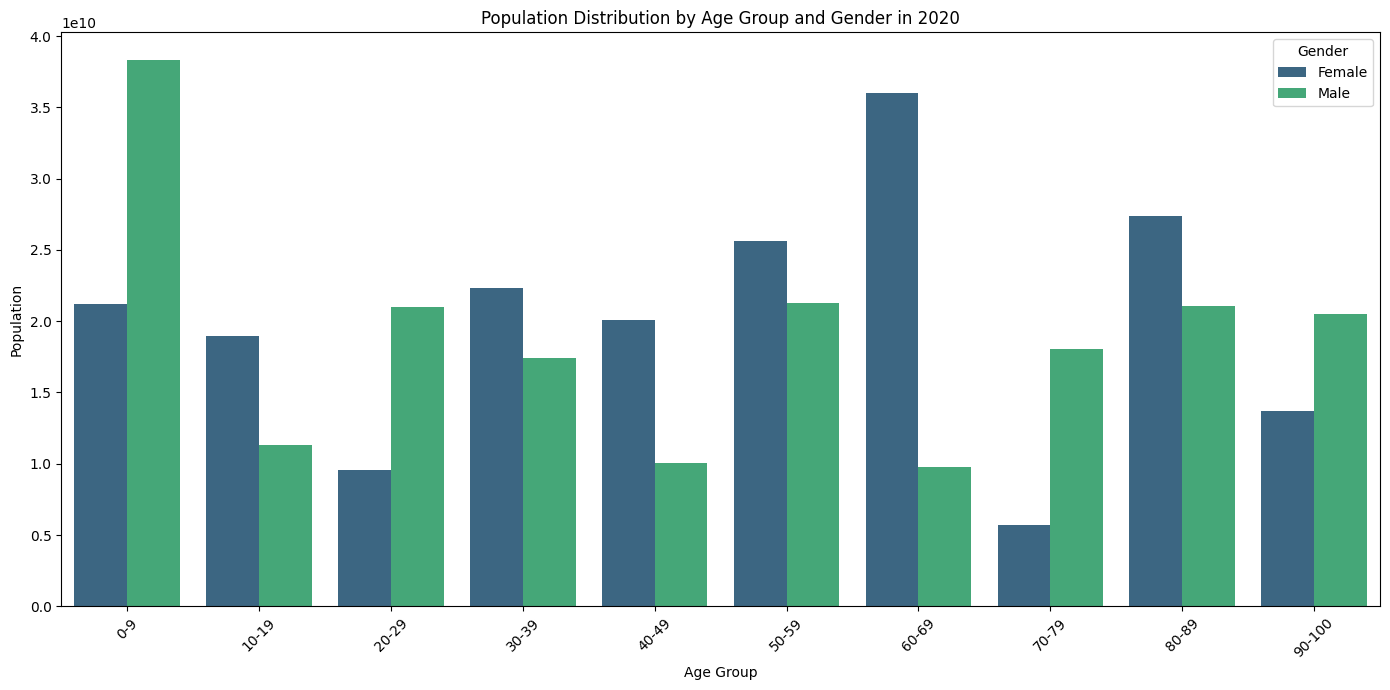

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for age distribution by gender
plt.figure(figsize=(14, 7))
sns.barplot(x='Age Group', y='Population', data=age_gender_distribution, hue='Gender', palette='viridis')

plt.xticks(rotation=45)
plt.title('Population Distribution by Age Group and Gender in 2020')
plt.xlabel('Age Group')
plt.ylabel('Population')
plt.legend(title='Gender')
plt.tight_layout()

# Save the plot as an image file
plt.savefig('age_gender_distribution_2020.png')
plt.show()

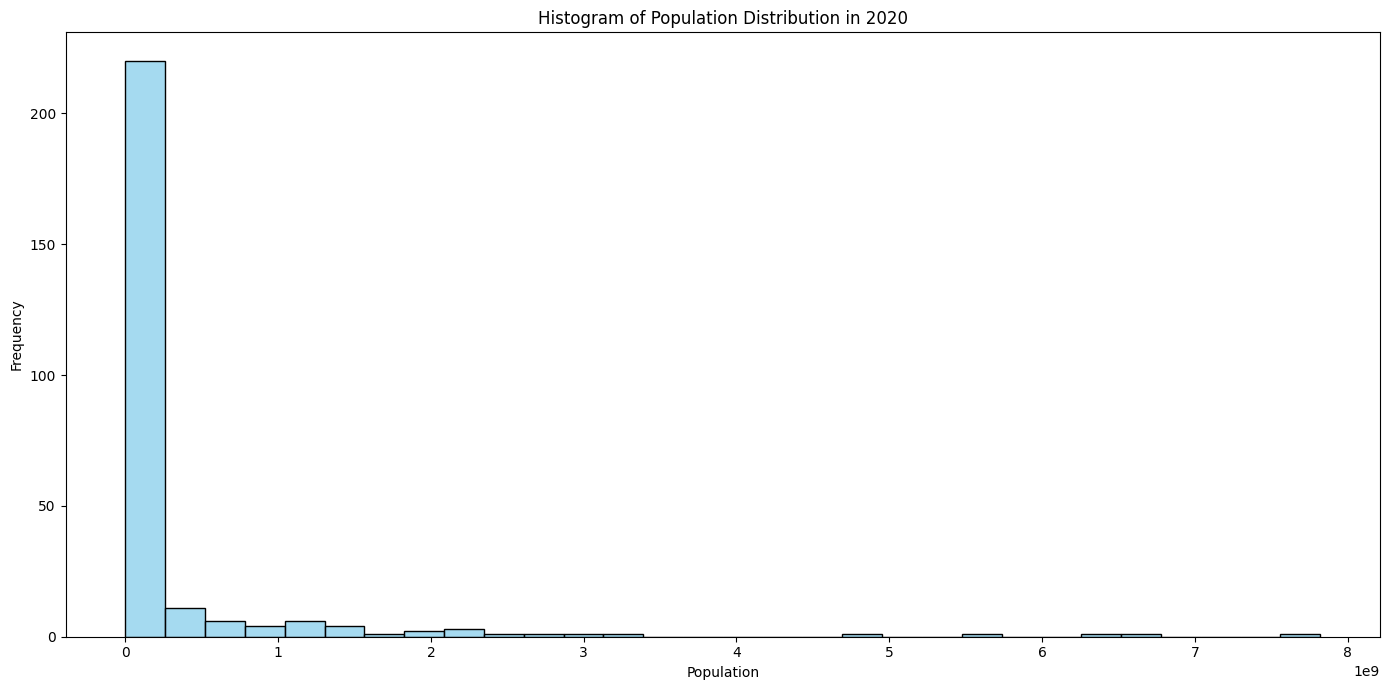

In [18]:
# Filter data for a specific year (e.g., 2020)
df_year = df_melted[df_melted['Year'] == 2020]

# Create a histogram for the population distribution
plt.figure(figsize=(14, 7))
sns.histplot(df_year['Population'], bins=30, kde=False, color='skyblue')

plt.title('Histogram of Population Distribution in 2020')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.tight_layout()

# Save the plot as an image file
plt.savefig('population_distribution_histogram_2020.png')
plt.show()




#Histogram: Shows the overall distribution of population values for the year 2020 without considering age or gender. 
# It is useful for understanding the general distribution and frequency of population sizes.
#- ----------------------------------------------------------------------------------------------
#Bar Chart: Displays the distribution of the population by age group and gender, offering a more detailed breakdown. 
# It helps in understanding demographic patterns and how population numbers vary across different age groups and between genders.

